In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [47]:
class LinearRegression:
    learning_rate: float
    iterations: int
    weights: np.ndarray = None
    b: float = 0
    __n_samples: int
    __n_features: int
    __x_train: np.ndarray
    __y_train: np.ndarray
    
    def __init__(self, learning_rate: float, iterations: int) -> None:
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        # классический метод для тренировки
        self.__x_train = x
        self.__y_train = y
        self.__n_samples, self.__n_features = self.__x_train.shape
        
        self.weights = np.zeros(self.__n_features)

        for i in range(self.iterations):
            y_pred = self.predict(self.__x_train)
            self.__update_weights(y_pred)

    def __update_weights(self, y_pred: np.ndarray) -> None:
        # здесь код для изменения весов
        y_diff = y_pred - self.__y_train
        dw = (1 / self.__n_samples) * np.dot(y_diff, self.__x_train)
        db = (1 / self.__n_samples) * np.sum(y_diff)
        self.weights -= self.learning_rate * dw
        self.b -= self.learning_rate * db
        
    def predict(self, x):
        # а тут предсказание значений
        return np.dot(x, self.weights) + self.b

In [2]:
df = pd.read_csv('resources/salary_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
df.shape

(30, 2)

Веса: 9514.81
Cвободный член: 24876.01
MAE: 5744.0
MAPE: 7.5%


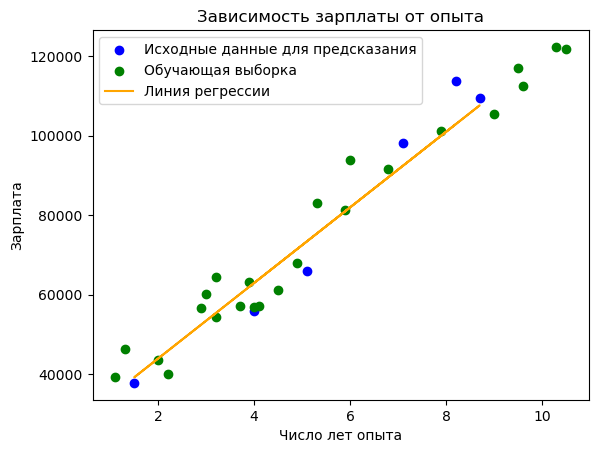

In [48]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Веса:', *np.round(model.weights, 2))
print('Cвободный член:', np.round(model.b, 2))
print(f'MAE: {np.round(mean_absolute_error(Y_test, Y_pred), 0)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(Y_test, Y_pred) * 100, 1)}%')

plt.scatter(X_test, Y_test, color = 'blue', label='Исходные данные для предсказания')
plt.scatter(X_train, Y_train, color = 'green', label='Обучающая выборка')
plt.plot(X_test, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()